In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import precision_score, recall_score,confusion_matrix, classification_report,accuracy_score,f1_score
from tensorflow.keras import callbacks

In [81]:
data = pd.read_csv('weatherAUS.csv')
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [83]:
data.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [84]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


In [85]:
data.shape

(145460, 23)

# **EDA And Data Cleaning**

<Axes: xlabel='RainTomorrow', ylabel='count'>

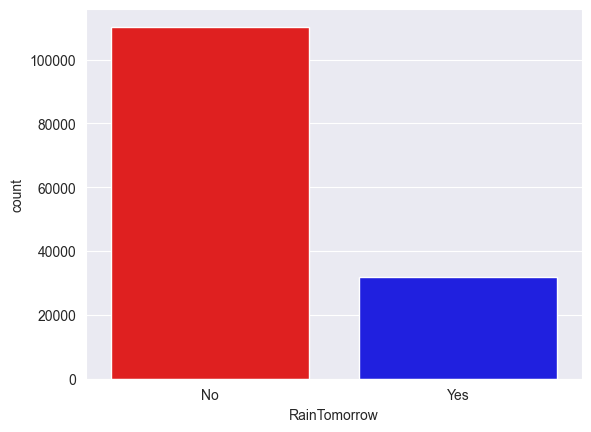

In [86]:
cols = ["red", "blue"]
sns.countplot(x=data['RainTomorrow'], palette=cols)

In [87]:
lengths = data['Date'].str.len()
lengths.value_counts()

Date
10    145460
Name: count, dtype: int64

In [88]:
data['Date'] = pd.to_datetime(data['Date'])

In [89]:
data = data.drop(['Date'], axis=1)
data

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [90]:
data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [91]:
s = (data.dtypes == "object")
object_cols = list(s[s].index)

print("Categorical variables: ")
print(object_cols)

Categorical variables: 
['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [92]:
for i in object_cols:
    print(i, data[i].isnull().sum())

Location 0
WindGustDir 10326
WindDir9am 10566
WindDir3pm 4228
RainToday 3261
RainTomorrow 3267


In [93]:
data = data.dropna(subset=object_cols)
data

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,E,...,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,No
145455,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No


In [94]:
t = (data.dtypes == "float64")
num_cols = list(t[t].index)

print("Numerical variables: ")
print(num_cols)

Numerical variables: 
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [95]:
for i in num_cols:
    print(i, data[i].isnull().sum())

MinTemp 90
MaxTemp 45
Rainfall 0
Evaporation 50647
Sunshine 56623
WindGustSpeed 0
WindSpeed9am 0
WindSpeed3pm 0
Humidity9am 1012
Humidity3pm 1522
Pressure9am 9120
Pressure3pm 9069
Cloud9am 46234
Cloud3pm 48233
Temp9am 343
Temp3pm 795


In [96]:
for i in num_cols:
    data[i].fillna(data[i].median(), inplace=True)
    

In [97]:
data.info()
data

<class 'pandas.core.frame.DataFrame'>
Index: 123710 entries, 0 to 145458
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       123710 non-null  object 
 1   MinTemp        123710 non-null  float64
 2   MaxTemp        123710 non-null  float64
 3   Rainfall       123710 non-null  float64
 4   Evaporation    123710 non-null  float64
 5   Sunshine       123710 non-null  float64
 6   WindGustDir    123710 non-null  object 
 7   WindGustSpeed  123710 non-null  float64
 8   WindDir9am     123710 non-null  object 
 9   WindDir3pm     123710 non-null  object 
 10  WindSpeed9am   123710 non-null  float64
 11  WindSpeed3pm   123710 non-null  float64
 12  Humidity9am    123710 non-null  float64
 13  Humidity3pm    123710 non-null  float64
 14  Pressure9am    123710 non-null  float64
 15  Pressure3pm    123710 non-null  float64
 16  Cloud9am       123710 non-null  float64
 17  Cloud3pm       123710 non-null  fl

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,4.8,8.6,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,No,No
1,Albury,7.4,25.1,0.0,4.8,8.6,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,No,No
2,Albury,12.9,25.7,0.0,4.8,8.6,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,No,No
3,Albury,9.2,28.0,0.0,4.8,8.6,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,No,No
4,Albury,17.5,32.3,1.0,4.8,8.6,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,Uluru,3.5,21.8,0.0,4.8,8.6,E,31.0,ESE,E,...,59.0,27.0,1024.7,1021.2,5.0,5.0,9.4,20.9,No,No
145455,Uluru,2.8,23.4,0.0,4.8,8.6,E,31.0,SE,ENE,...,51.0,24.0,1024.6,1020.3,5.0,5.0,10.1,22.4,No,No
145456,Uluru,3.6,25.3,0.0,4.8,8.6,NNW,22.0,SE,N,...,56.0,21.0,1023.5,1019.1,5.0,5.0,10.9,24.5,No,No
145457,Uluru,5.4,26.9,0.0,4.8,8.6,N,37.0,SE,WNW,...,53.0,24.0,1021.0,1016.8,5.0,5.0,12.5,26.1,No,No


In [98]:
le = LabelEncoder()
for i in data.columns:
    data[i] = le.fit_transform(data[i])
    
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 123710 entries, 0 to 145458
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   Location       123710 non-null  int32
 1   MinTemp        123710 non-null  int64
 2   MaxTemp        123710 non-null  int64
 3   Rainfall       123710 non-null  int64
 4   Evaporation    123710 non-null  int64
 5   Sunshine       123710 non-null  int64
 6   WindGustDir    123710 non-null  int32
 7   WindGustSpeed  123710 non-null  int64
 8   WindDir9am     123710 non-null  int32
 9   WindDir3pm     123710 non-null  int32
 10  WindSpeed9am   123710 non-null  int64
 11  WindSpeed3pm   123710 non-null  int64
 12  Humidity9am    123710 non-null  int64
 13  Humidity3pm    123710 non-null  int64
 14  Pressure9am    123710 non-null  int64
 15  Pressure3pm    123710 non-null  int64
 16  Cloud9am       123710 non-null  int64
 17  Cloud3pm       123710 non-null  int64
 18  Temp9am        123710 non-nul

In [99]:
features = data.drop(['RainTomorrow'],axis=1)
target = data['RainTomorrow']

In [100]:
col_names = list(features.columns)
sc = StandardScaler()
features = sc.fit_transform(features)
features = pd.DataFrame(features, columns=col_names)

<Axes: >

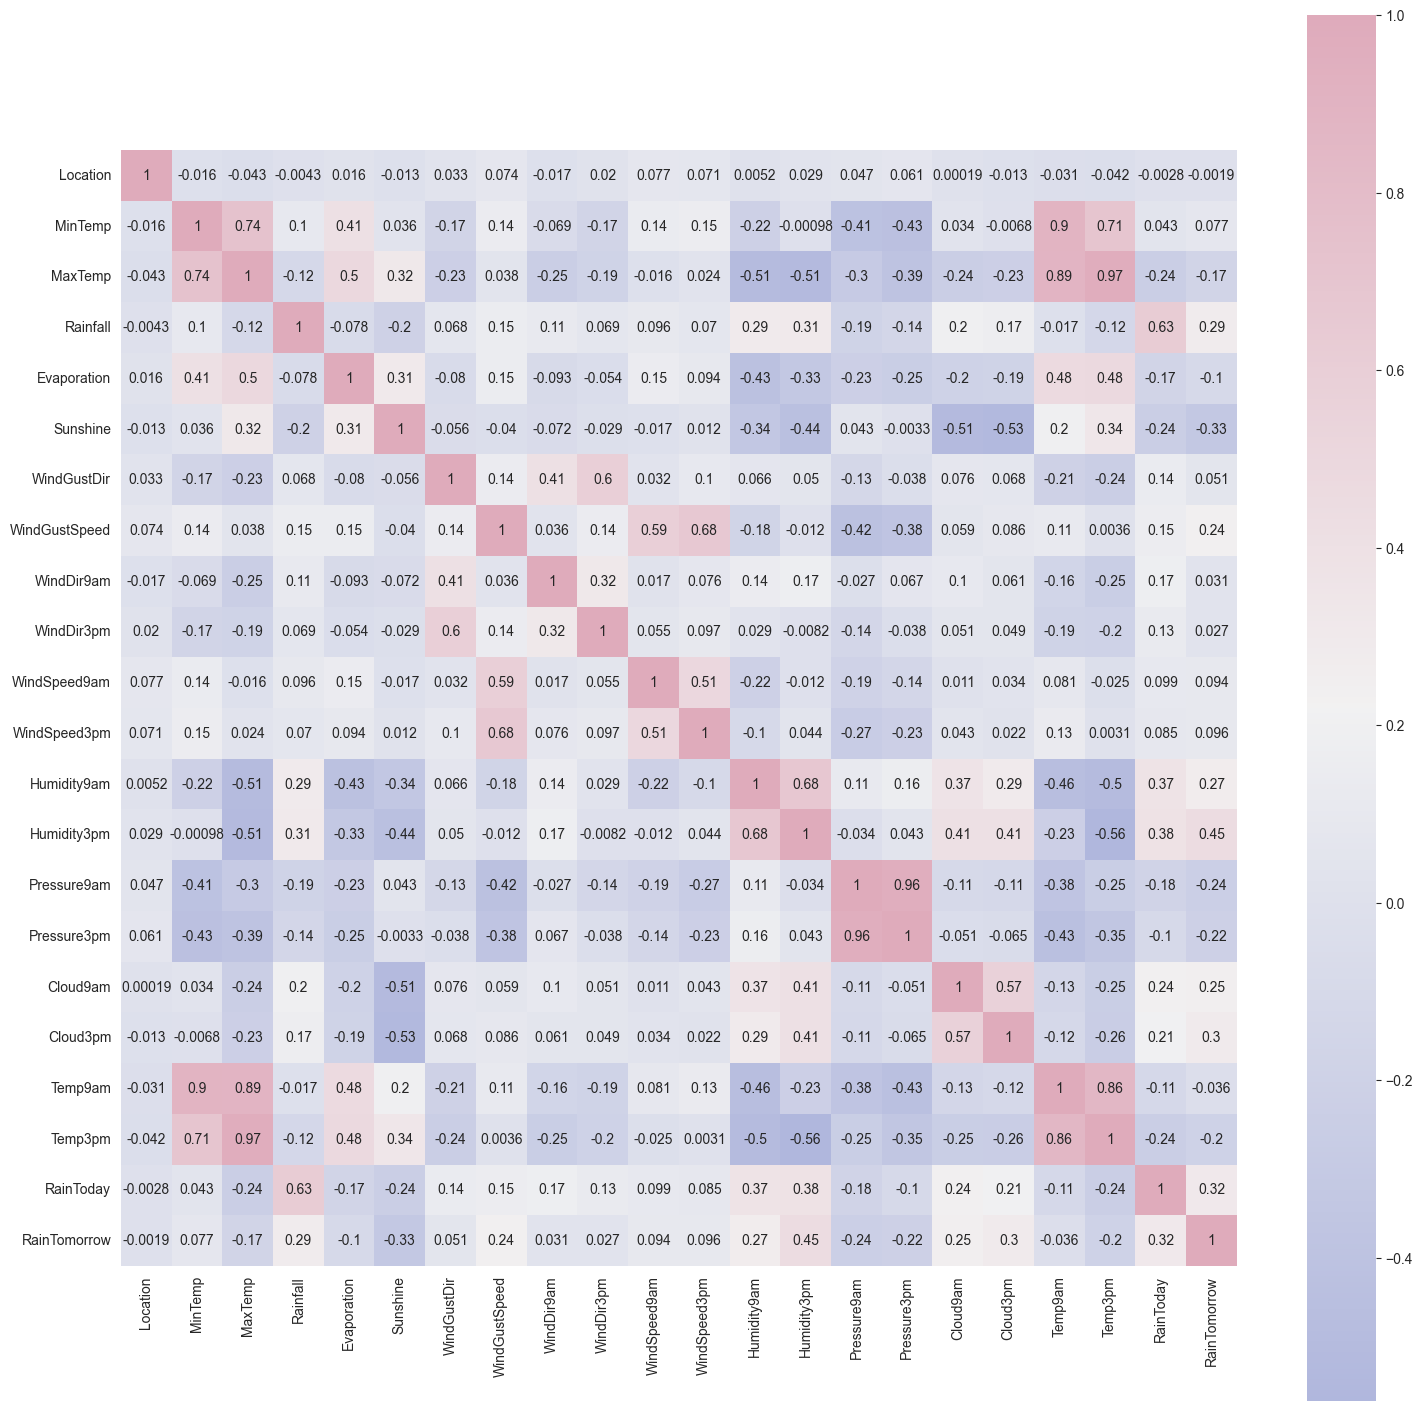

In [101]:
corrmat = data.corr()
cmap = sns.diverging_palette(260,-10,s=50, l=75, n=6, as_cmap=True)
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,cmap= cmap,annot=True, square=True)

# **Modelling**

In [102]:
X = data.drop(["RainTomorrow"], axis = 1)
y = data["RainTomorrow"]

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.42,random_state=42)

In [104]:
X.shape

(123710, 21)

In [105]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001,
    patience=20,
    restore_best_weights=True,
)

In [106]:
model = Sequential()

In [107]:
model.add(Dense(32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))


In [108]:
opt = Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [109]:
history = model.fit(X_train,y_train,epochs=150,batch_size=32,callbacks=[early_stopping],validation_split=0.2)

Epoch 1/150
1794/1794 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8027 - loss: 0.4624 - val_accuracy: 0.8430 - val_loss: 0.3800
Epoch 2/150
1794/1794 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8239 - loss: 0.4023 - val_accuracy: 0.8465 - val_loss: 0.3627
Epoch 3/150
1794/1794 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8207 - loss: 0.3995 - val_accuracy: 0.8462 - val_loss: 0.3586
Epoch 4/150
1794/1794 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8245 - loss: 0.3950 - val_accuracy: 0.8431 - val_loss: 0.3638
Epoch 5/150
1794/1794 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8234 - loss: 0.3958 - val_accuracy: 0.8502 - val_loss: 0.3619
Epoch 6/150
1794/1794 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8252 - loss: 0.3928 - val_accuracy: 0.8250 - val_loss: 0.3718
Epoch 7/150
1794/1794 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8248 - loss: 0.3896 - val_accuracy: 0.8466 - val_loss: 0.3549
Epoch 8/150
1794/1794 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8266 - loss: 0

In [110]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

1624/1624 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


# **Data Performance**

Confusion Matrix:
 [[38974  1544]
 [ 6241  5200]]


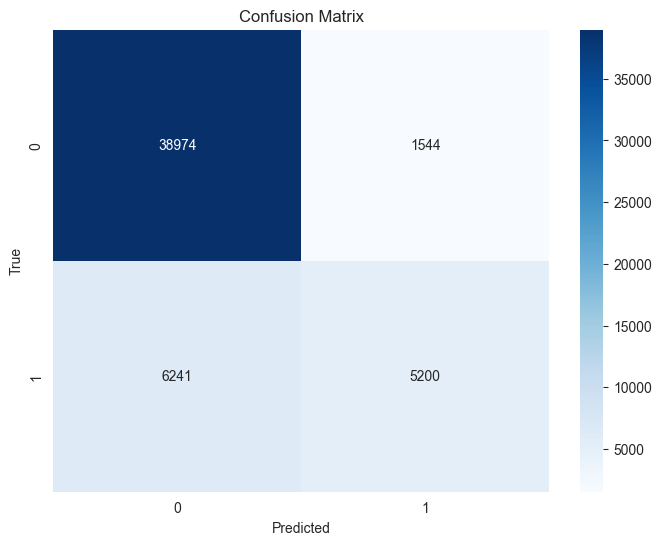

In [111]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [112]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91     40518
           1       0.77      0.45      0.57     11441

    accuracy                           0.85     51959
   macro avg       0.82      0.71      0.74     51959
weighted avg       0.84      0.85      0.83     51959


In [113]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.85
